## "Convolutional Neural Network Application"
<br>
<img src="./images/Binary_smile_or_not.jpg" style="">
<caption><center><b> <font color="blue">Fig1. HappyFace dataset</captoin></center></b></font>

In [1]:
# importing fundamental packages:
# import:
import math
import h5py
import scipy
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers as tfl

# form:
from PIL import Image
from cnn_utils import *
from matplotlib.pyplot import imread
from test_utils import summary, comparator
from tensorflow.python.framework import ops
from tensorflow.keras.utils import to_categorical

# magic command:
np.random.seed(1)
%matplotlib inline

### 1) Loading the Data and split data into Train/Test sets:

- dataset => <b>Happy House dataset</b> => containing images of people's face.
- type => <b>binary classification</b> => simle or not ! :) or :(

In [2]:
# loading data:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalizing image vectors:
X_train = X_train_orig / 255
X_test = X_test_orig / 255

# # Reshaping from (1, 600) to (600, 1)
# Y_train = Y_train_orig.T
#Y_test = Y_test_orig.T

# one-hot encoding:
Y_train = convert_to_one_hot(Y_train_orig, 2).T
Y_test = convert_to_one_hot(Y_test_orig, 2).T

# printing:
print(f"number of training example: {X_train.shape[0]}")
print(f"number of test example: {X_test.shape[0]}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

number of training example: 600
number of test example: 150
X_train shape: (600, 64, 64, 3)
X_test shape: (150, 64, 64, 3)
Y_train shape: (600, 2)
Y_test shape: (150, 2)


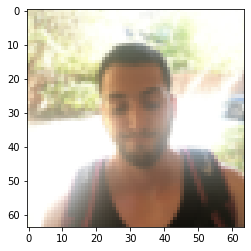

In [3]:
# visualizing our dataset:
# one image:
image_index = 124
plt.imshow(X_train_orig[image_index])
plt.show()

___
### Layers in TF (TensorFlow) Keras API:

- In <b>tf.keras()</b>, you don't have to write code directly to create layers. rather, <b>tf.keras()</b> has pre-defined layers that you can use.
- <b>Keras</b> is a high-level API built on top of `TensorFlow`, which allows for more simplified and optimized model creation and training.

- For this problem, we'll be creating a model using Keras' Sequential's API and it's ideal for building models where each layer has <b>`exactly one input`</b> tensor and <b>one</b> output tensor.
- The <b>Functional API</b> is<font color="red"> more powerfull</font> than <b>Sequential API</b>.
- For any layer construction in Keras, you'll need to specify <b>the input shape</b> in advance.

In [4]:
# defining our model using Keras' Sequential Model:

def happy_model():
    """
    Implementing the forward propagation for binary classification model:
    
    ZeroPad => Conv2D => BatchNorm => ReLU => MaxPool => Flatten => Dense
    
    Arguments:
    No Argument!
    
    Return:
    model => TF Keras model (it's an object, containing all information for the entire training process.)
    
    """
    
    model = tf.keras.Sequential([
        
        # ZeroPadding2D layer => padding = 3, input shape =  64 x 64 x 3:
        tf.keras.layers.InputLayer(input_shape=(64, 64, 3)),
        tf.keras.layers.ZeroPadding2D(padding=3),
        
        # Conv2D layer => filters = 32, 7 x7 filter size, stride of 1:
        tf.keras.layers.Conv2D(filters=32,
                               kernel_size=(7, 7),
                               strides=(1,1),
                               padding="valid"),
        
        # BatchNormalizaton for axis= 3:
        tf.keras.layers.BatchNormalization(axis=3),
        
        # ReLU activation functoin:
        tf.keras.layers.ReLU(),
        
        # Max pooling 2D layer, with default values:
        tf.keras.layers.MaxPool2D(),
        
        # Flatten layer:
        tf.keras.layers.Flatten(),
        
        # Desne layer with 2 unit (simle or not => 0 or 1)
        tf.keras.layers.Dense(2, activation="sigmoid")
    ])
    
    return model

In [5]:
# testing happy_model() function:
happy_model = happy_model()

for layer in summary(happy_model):
    print(layer)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 2), 65538, 'sigmoid']


In [6]:
# compiling our model:
happy_model.compile(optimizer="adam", 
                    loss="binary_crossentropy", 
                    metrics=["accuracy"])

In [7]:
# it's time to check our model's parameters:
# using model_name.summary()
happy_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6

In [8]:
# Training and Evaluating our model:
# Training => .fit()
happy_model.fit(x = X_train,
                y = Y_train,
                epochs = 9,
                batch_size = 16)

Epoch 1/9
38/38 [==============================] - 19s 476ms/step - loss: 1.3457 - accuracy: 0.6967
Epoch 2/9
38/38 [==============================] - 18s 465ms/step - loss: 0.2191 - accuracy: 0.9133
Epoch 3/9
38/38 [==============================] - 17s 458ms/step - loss: 0.2043 - accuracy: 0.9250
Epoch 4/9
38/38 [==============================] - 17s 442ms/step - loss: 0.2012 - accuracy: 0.9267
Epoch 5/9
38/38 [==============================] - 19s 496ms/step - loss: 0.0995 - accuracy: 0.9683
Epoch 6/9
38/38 [==============================] - 18s 483ms/step - loss: 0.1630 - accuracy: 0.9317
Epoch 7/9
38/38 [==============================] - 16s 434ms/step - loss: 0.1200 - accuracy: 0.9683
Epoch 8/9
38/38 [==============================] - 16s 424ms/step - loss: 0.1064 - accuracy: 0.9617
Epoch 9/9
38/38 [==============================] - 18s 476ms/step - loss: 0.0927 - accuracy: 0.9683


In [9]:
# Evaluating => .Evaluate()
happy_model.evaluate(x=X_test,
                     y=Y_test)

5/5 [==============================] - 2s 313ms/step - loss: 0.7660 - accuracy: 0.7000


[0.7660091519355774, 0.699999988079071]

In [10]:
# saving our model:
happy_model.save("./saved_model_1/happy_model.h5")

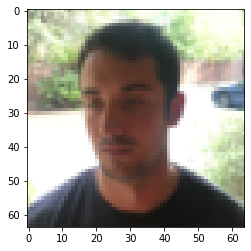

In [11]:
# Testing our model visually:
test_index = 71  
test_image = X_test[test_index] # => he's not smiling
plt.imshow(test_image)
plt.show()

In [12]:
# using our model to predict:
net_predict = np.argmax(happy_model.predict(test_image.reshape(1, 64, 64, 3)), axis=1)
print("He is smiling") if net_predict==1 else print("He is not smiling")

He is not smiling


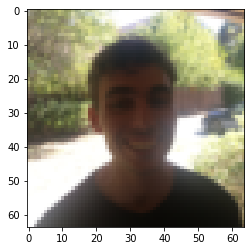

In [13]:
# Testing our model visually:
test_index = 69
test_image = X_test[test_index] # => he's smiling
plt.imshow(test_image)
plt.show()

In [14]:
# using our model to predict:
net_predict = np.argmax(happy_model.predict(test_image.reshape(1, 64, 64, 3)), axis=1)
print("He is smiling") if net_predict==1 else print("He is not smiling")

He is smiling


## THE END 